In [67]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import add, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [68]:
data = pd.read_csv("/content/creditcard.csv")

In [69]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [70]:
data.shape

(97142, 31)

0.0    96919
1.0      222
Name: Class, dtype: int64

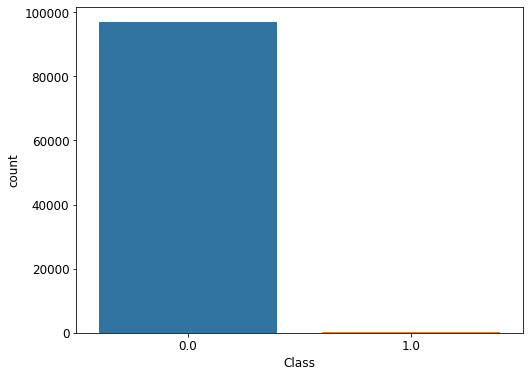

In [71]:
sns.countplot(x=data['Class'])
data["Class"].value_counts()

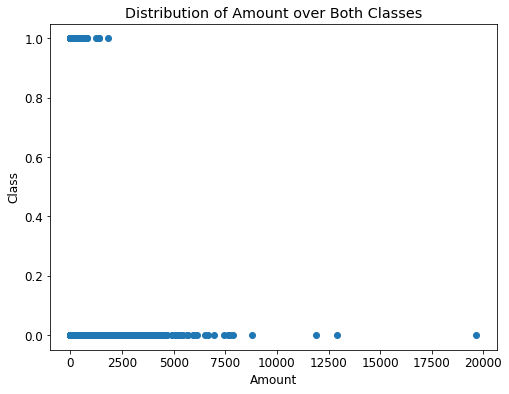

In [72]:
plt.rcParams["figure.figsize"] = "8,6"
font = {'size': 12}
plt.rc('font', **font)

# Adding titles to the plots and axes
plt.title("Distribution of Amount over Both Classes")
plt.xlabel("Amount")
plt.ylabel("Class")

# Plotting the Amount column vs. Class Column
plt.scatter(data["Amount"],data["Class"])

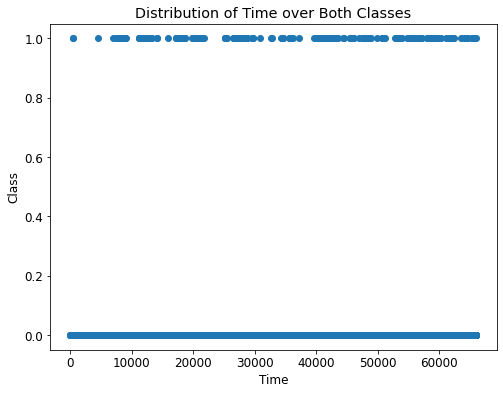

In [73]:
plt.rcParams["figure.figsize"] = "8,6"
font = {'size': 12}
plt.rc('font', **font)

# Adding titles to the plots and axes
plt.title("Distribution of Time over Both Classes")
plt.xlabel("Time")
plt.ylabel("Class")

# Plotting the Time column vs. Class Column
plt.scatter(data["Time"],data["Class"])

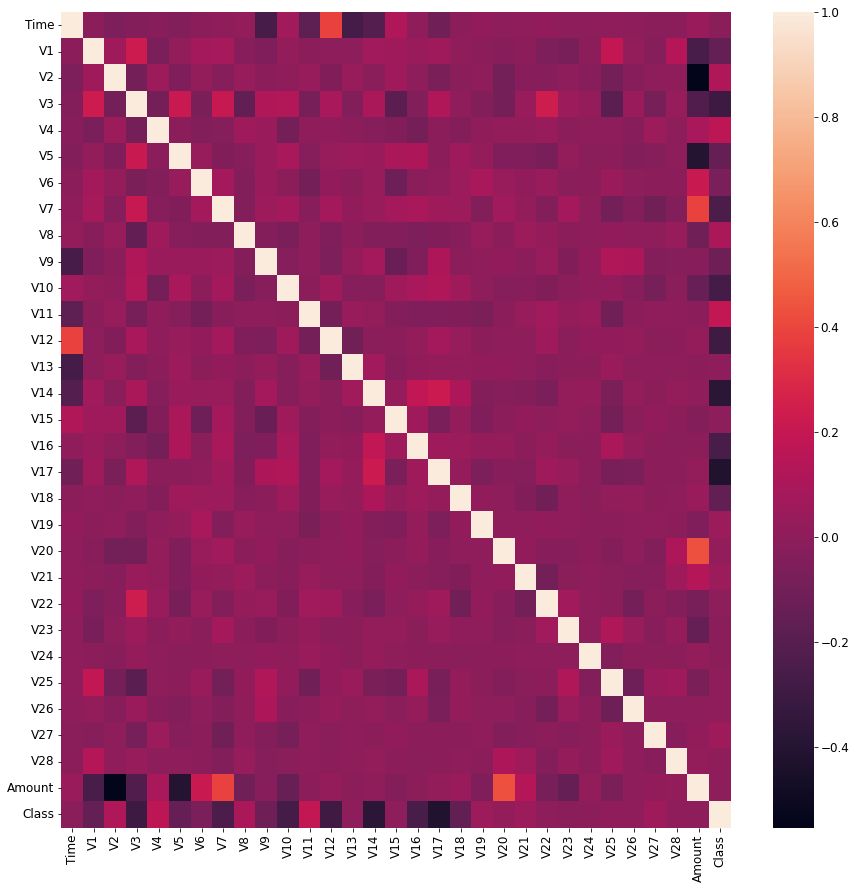

In [74]:
correlation = data.corr()
fig = plt.subplots(figsize=(15,15)) 
sns.heatmap(correlation, vmax= 1 )

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()


In [77]:
data_clean = data.copy()

In [78]:
data_clean['Scaler_amount'] = scaler.fit_transform(data_clean['Amount'].values.reshape(-1, 1))
data_clean['Scaler_time'] = scaler.fit_transform(data_clean['Time'].values.reshape(-1, 1))

In [79]:
data_clean.drop(['Time','Amount'], axis = 1, inplace = True)

In [80]:
data_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaler_amount,Scaler_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.192785,-2.487852
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.359670,-2.487852
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.053971,-2.487792
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.094574,-2.487792
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,-0.106623,-2.487732


In [81]:
percent = (data_clean.isnull().sum() / 79317)

In [82]:
print(percent)

V1               0.000000
V2               0.000000
V3               0.000000
V4               0.000000
V5               0.000000
V6               0.000000
V7               0.000000
V8               0.000000
V9               0.000000
V10              0.000000
V11              0.000000
V12              0.000000
V13              0.000000
V14              0.000000
V15              0.000000
V16              0.000000
V17              0.000000
V18              0.000000
V19              0.000013
V20              0.000013
V21              0.000013
V22              0.000013
V23              0.000013
V24              0.000013
V25              0.000013
V26              0.000013
V27              0.000013
V28              0.000013
Class            0.000013
Scaler_amount    0.000013
Scaler_time      0.000000
dtype: float64


In [83]:
data_clean = data_clean.dropna()

In [84]:
percent = (data_clean.isnull().sum() / 79317)
print(percent)

V1               0.0
V2               0.0
V3               0.0
V4               0.0
V5               0.0
V6               0.0
V7               0.0
V8               0.0
V9               0.0
V10              0.0
V11              0.0
V12              0.0
V13              0.0
V14              0.0
V15              0.0
V16              0.0
V17              0.0
V18              0.0
V19              0.0
V20              0.0
V21              0.0
V22              0.0
V23              0.0
V24              0.0
V25              0.0
V26              0.0
V27              0.0
V28              0.0
Class            0.0
Scaler_amount    0.0
Scaler_time      0.0
dtype: float64


In [85]:
X = data_clean.drop('Class', axis=1)
y = data_clean['Class']

In [86]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 42,shuffle=True)

0.0    154
1.0    154
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


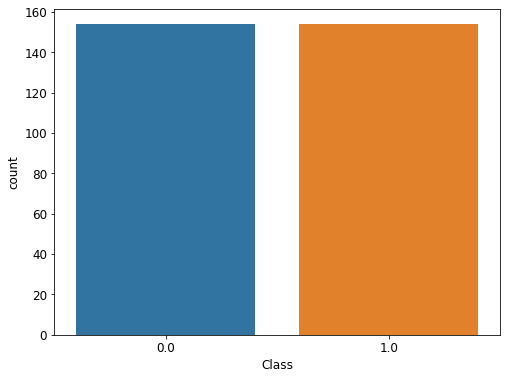

In [87]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print(pd.Series(y_rus).value_counts())
sns.countplot(y_rus);

In [88]:
smote = SMOTE()

In [89]:
X_smo, y_smo = smote.fit_resample(X_train,y_train)

0.0    67844
1.0    67844
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


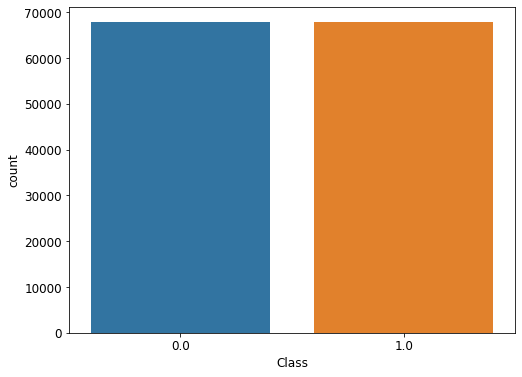

In [90]:
print(pd.Series(y_smo).value_counts())# Plot the new Class distribution
sns.countplot(y_smo);

0.0    67844
1.0    67836
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


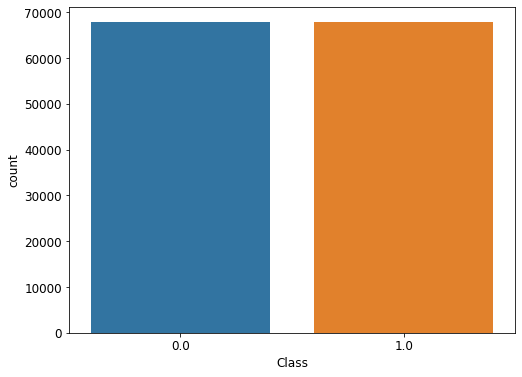

In [91]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X_train, y_train)
print(pd.Series(y_ada).value_counts())
sns.countplot(y_ada);

In [92]:
randomFlorest =  RandomForestClassifier(n_estimators= 15, random_state = 42)
randomFlorest.fit(X_train,y_train)
predicition_randomFlorest = randomFlorest.predict(X_test)

In [93]:
precision = precision_score(y_test, predicition_randomFlorest)
recall = recall_score(y_test, predicition_randomFlorest)
f1 = f1_score(y_test, predicition_randomFlorest)
print("precision :",precision, "Recall :",recall,"F-score :",f1)

precision : 0.9622641509433962 Recall : 0.75 F-score : 0.8429752066115702


In [94]:
randomFlorest_rus =  RandomForestClassifier(n_estimators= 15, random_state = 42)
randomFlorest_rus.fit(X_rus,y_rus)
predicition_randomFlorest_rus = randomFlorest_rus.predict(X_test)

In [95]:
precision = precision_score(y_test, predicition_randomFlorest_rus)
recall = recall_score(y_test, predicition_randomFlorest_rus)
f1 = f1_score(y_test, predicition_randomFlorest_rus)
print("precision :",precision, "Recall :",recall,"F-score :",f1)

precision : 0.0403172504957039 Recall : 0.8970588235294118 F-score : 0.07716635041113219


In [96]:
randomFlorest_smo =  RandomForestClassifier(n_estimators= 15, random_state = 42)
randomFlorest_smo.fit(X_smo,y_smo)
predicition_randomFlorest_smo = randomFlorest_smo.predict(X_test)

In [97]:
precision = precision_score(y_test, predicition_randomFlorest_smo)
recall = recall_score(y_test, predicition_randomFlorest_smo)
f1 = f1_score(y_test, predicition_randomFlorest_smo)
print("precision :",precision, "Recall :",recall,"F-score :",f1)

precision : 0.8983050847457628 Recall : 0.7794117647058824 F-score : 0.8346456692913385


In [98]:
randomFlorest_ada =  RandomForestClassifier(n_estimators= 15, random_state = 42)
randomFlorest_ada.fit(X_ada,y_ada)
predicition_randomFlorest_ada = randomFlorest_ada.predict(X_test)

In [99]:
precision = precision_score(y_test, predicition_randomFlorest_ada)
recall = recall_score(y_test, predicition_randomFlorest_ada)
f1 = f1_score(y_test, predicition_randomFlorest_ada)
print("precision :",precision, "Recall :",recall,"F-score :",f1)

precision : 0.9272727272727272 Recall : 0.75 F-score : 0.8292682926829268


In [100]:
logReg = LogisticRegression(max_iter=7600)

logReg.fit(X_train, y_train)

log_y_pred = logReg.predict(X_test)

log_precision = precision_score(y_test, log_y_pred)
log_recall = recall_score(y_test, log_y_pred)
log_f1 = f1_score(y_test, log_y_pred)
print("precision :",log_precision, "Recall :",log_recall,"F-score :",log_f1)

precision : 0.8666666666666667 Recall : 0.5735294117647058 F-score : 0.6902654867256638


In [101]:
logReg_rus = LogisticRegression()

logReg_rus.fit(X_rus, y_rus)

log_y_pred_rus = logReg_rus.predict(X_test)

log_precision = precision_score(y_test, log_y_pred_rus)
log_recall = recall_score(y_test, log_y_pred_rus)
log_f1 = f1_score(y_test, log_y_pred)
print("precision :",log_precision, "Recall :",log_recall,"F-score :",log_f1)

precision : 0.05267702936096719 Recall : 0.8970588235294118 F-score : 0.6902654867256638


In [102]:
model_log_smo = LogisticRegression(max_iter=7600)
model_log_smo.fit(X_smo, y_smo)
y_pred_smo = model_log_smo.predict(X_test)

log_precision = precision_score(y_test, y_pred_smo)
log_recall = recall_score(y_test, y_pred_smo)
log_f1 = f1_score(y_test, y_pred_smo)
print("precision :",log_precision, "Recall :",log_recall,"F-score :",log_f1)

precision : 0.09259259259259259 Recall : 0.8823529411764706 F-score : 0.16759776536312848


In [103]:
model_log_ada = LogisticRegression(max_iter=7600)
model_log_ada.fit(X_ada, y_ada)
y_pred_ada = model_log_ada.predict(X_test)

log_precision = precision_score(y_test, y_pred_ada)
log_recall = recall_score(y_test, y_pred_ada)
log_f1 = f1_score(y_test, y_pred_ada)
print("precision :",log_precision, "Recall :",log_recall,"F-score :",log_f1)

precision : 0.04155124653739612 Recall : 0.8823529411764706 F-score : 0.07936507936507936


In [104]:


model = Sequential()

model.add(Dense(64,input_dim=30,activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(learning_rate=1e-4, decay=1e-6)

model.compile(loss="binary_crossentropy",optimizer=opt,metrics=['Precision','Recall'])

model.fit(X_train, y_train, epochs = 5,\
                    validation_data = (X_test, y_test))


Epoch 1/5
2125/2125 [==============================] - 7s 3ms/step - loss: 0.2114 - precision: 0.0019 - recall: 0.0714 - val_loss: 0.0175 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
2125/2125 [==============================] - 5s 2ms/step - loss: 0.0165 - precision: 0.2500 - recall: 0.0065 - val_loss: 0.0111 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
2125/2125 [==============================] - 5s 3ms/step - loss: 0.0091 - precision: 0.1250 - recall: 0.0065 - val_loss: 0.0091 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
2125/2125 [==============================] - 9s 4ms/step - loss: 0.0063 - precision: 0.7317 - recall: 0.1948 - val_loss: 0.0079 - val_precision: 0.8571 - val_recall: 0.4412
Epoch 5/5
2125/2125 [==============================] - 7s 3ms/step - loss: 0.0057 - precision: 0.7629 - recall: 0.4805 - val_loss: 0.0075 - val_precision: 0.8913 - val_recall: 0.6029


In [105]:
predicition_neuralNetWork =  model.predict(X_test)

In [108]:


precision_network = precision_score(y_test, predicition_neuralNetWork.round())
recall_network = recall_score(y_test, predicition_neuralNetWork.round())
f1_network = f1_score(y_test, predicition_neuralNetWork.round())
print("precision :",precision_network, "Recall :",recall_network,"F-score :",f1_network)

precision : 0.8913043478260869 Recall : 0.6029411764705882 F-score : 0.719298245614035


In [109]:


model_rus = Sequential()

model_rus.add(Dense(64,input_dim=30,activation='relu'))
model_rus.add(Dense(32, activation = 'relu'))
model_rus.add(Dropout(0.5))
model_rus.add(Dense(16,activation = 'relu'))
model_rus.add(Dropout(0.15))
model_rus.add(Dense(1, activation = 'sigmoid'))

opt = Adam(learning_rate=1e-4, decay=1e-6)

model_rus.compile(loss="binary_crossentropy",optimizer=opt,metrics=['Precision','Recall'])

model_rus.fit(X_rus, y_rus, epochs = 5,\
                    validation_data = (X_test, y_test))

Epoch 1/5
10/10 [==============================] - 2s 150ms/step - loss: 0.8657 - precision: 0.5679 - recall: 0.2987 - val_loss: 0.5753 - val_precision: 0.0151 - val_recall: 0.3824
Epoch 2/5
10/10 [==============================] - 1s 114ms/step - loss: 0.7391 - precision: 0.6786 - recall: 0.4935 - val_loss: 0.5781 - val_precision: 0.0199 - val_recall: 0.5441
Epoch 3/5
10/10 [==============================] - 1s 144ms/step - loss: 0.7224 - precision: 0.6583 - recall: 0.5130 - val_loss: 0.5795 - val_precision: 0.0248 - val_recall: 0.7059
Epoch 4/5
10/10 [==============================] - 1s 111ms/step - loss: 0.6716 - precision: 0.7661 - recall: 0.6169 - val_loss: 0.5807 - val_precision: 0.0250 - val_recall: 0.7353
Epoch 5/5
10/10 [==============================] - 1s 114ms/step - loss: 0.5739 - precision: 0.7718 - recall: 0.7468 - val_loss: 0.5807 - val_precision: 0.0252 - val_recall: 0.7500


In [110]:
predicition_neuralNetWork_rus =  model_rus.predict(X_test)

In [111]:

precision_network = precision_score(y_test, predicition_neuralNetWork_rus.round())
recall_network = recall_score(y_test,  predicition_neuralNetWork_rus.round())
f1_network = f1_score(y_test,  predicition_neuralNetWork_rus.round())
print("precision :",precision_network, "Recall :",recall_network,"F-score :",f1_network)

precision : 0.025172754195459033 Recall : 0.75 F-score : 0.04871060171919771


In [112]:


model_smo = Sequential()

model_smo.add(Dense(64,input_dim=30,activation='relu'))
model_smo.add(Dense(32, activation = 'relu'))
model_smo.add(Dropout(0.5))
model_smo.add(Dense(16,activation = 'relu'))
model_smo.add(Dropout(0.15))
model_smo.add(Dense(1, activation = 'sigmoid'))

opt = Adam(learning_rate=1e-4, decay=1e-6)

model_smo.compile(loss="binary_crossentropy",optimizer=opt,metrics=['Precision','Recall'])

model_smo.fit(X_smo, y_smo, epochs = 5,\
                    validation_data = (X_test, y_test))

Epoch 1/5
4241/4241 [==============================] - 10s 2ms/step - loss: 0.1426 - precision: 0.9565 - recall: 0.9356 - val_loss: 0.0293 - val_precision: 0.1681 - val_recall: 0.8676
Epoch 2/5
4241/4241 [==============================] - 9s 2ms/step - loss: 0.0309 - precision: 0.9926 - recall: 0.9923 - val_loss: 0.0155 - val_precision: 0.4029 - val_recall: 0.8235
Epoch 3/5
4241/4241 [==============================] - 10s 2ms/step - loss: 0.0164 - precision: 0.9961 - recall: 0.9988 - val_loss: 0.0154 - val_precision: 0.4453 - val_recall: 0.8382
Epoch 4/5
4241/4241 [==============================] - 9s 2ms/step - loss: 0.0105 - precision: 0.9974 - recall: 0.9997 - val_loss: 0.0150 - val_precision: 0.5700 - val_recall: 0.8382
Epoch 5/5
4241/4241 [==============================] - 9s 2ms/step - loss: 0.0078 - precision: 0.9981 - recall: 0.9997 - val_loss: 0.0144 - val_precision: 0.6548 - val_recall: 0.8088


In [113]:
predicition_neuralNetWork_smo =  model_smo.predict(X_test)

precision_network = precision_score(y_test, predicition_neuralNetWork_smo.round())
recall_network = recall_score(y_test, predicition_neuralNetWork_smo.round())
f1_network = f1_score(y_test, predicition_neuralNetWork_smo.round())
print("precision :",precision_network, "Recall :",recall_network,"F-score :",f1_network)

precision : 0.6547619047619048 Recall : 0.8088235294117647 F-score : 0.7236842105263157


In [114]:

model_ada = Sequential()

model_ada.add(Dense(64,input_dim=30,activation='relu'))
model_ada.add(Dense(32, activation = 'relu'))
model_ada.add(Dropout(0.5))
model_ada.add(Dense(16,activation = 'relu'))
model_ada.add(Dropout(0.15))
model_ada.add(Dense(1, activation = 'sigmoid'))

opt = Adam(learning_rate=1e-4, decay=1e-6)

model_ada.compile(loss="binary_crossentropy",optimizer=opt,metrics=['Precision','Recall'])

model_ada.fit(X_ada, y_ada, epochs = 5,\
                    validation_data = (X_test, y_test))

Epoch 1/5
4240/4240 [==============================] - 10s 2ms/step - loss: 0.2000 - precision: 0.9346 - recall: 0.9104 - val_loss: 0.0351 - val_precision: 0.1497 - val_recall: 0.8676
Epoch 2/5
4240/4240 [==============================] - 9s 2ms/step - loss: 0.0319 - precision: 0.9906 - recall: 0.9985 - val_loss: 0.0183 - val_precision: 0.3654 - val_recall: 0.8382
Epoch 3/5
4240/4240 [==============================] - 9s 2ms/step - loss: 0.0153 - precision: 0.9955 - recall: 0.9997 - val_loss: 0.0146 - val_precision: 0.5455 - val_recall: 0.7941
Epoch 4/5
4240/4240 [==============================] - 9s 2ms/step - loss: 0.0094 - precision: 0.9973 - recall: 0.9998 - val_loss: 0.0148 - val_precision: 0.6067 - val_recall: 0.7941
Epoch 5/5
4240/4240 [==============================] - 9s 2ms/step - loss: 0.0071 - precision: 0.9981 - recall: 0.9999 - val_loss: 0.0160 - val_precision: 0.6923 - val_recall: 0.7941


In [115]:
predicition_neuralNetWork_ada =  model_ada.predict(X_test)

In [116]:

precision_network = precision_score(y_test, predicition_neuralNetWork_ada.round())
recall_network = recall_score(y_test, predicition_neuralNetWork_ada.round())
f1_network = f1_score(y_test, predicition_neuralNetWork_ada.round())
print("precision :",precision_network, "Recall :",recall_network,"F-score :",f1_network)

precision : 0.6923076923076923 Recall : 0.7941176470588235 F-score : 0.7397260273972601
